## Importing Libraries for Data Manipulation and Visualization

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import seaborn as sns

In [ ]:
Data = pd.read_csv('Pressure_with_Anomaly_2.csv')

In [ ]:
Data.head()

,timestamp,value
0,10/4/2018 0:00,19.19495
1,10/4/2018 0:27,19.04453
2,10/4/2018 0:28,19.26260
3,10/4/2018 0:37,19.05637
4,10/4/2018 0:46,19.25317


In [ ]:
Data['datetime'] = pd.to_datetime(Data["timestamp"])

In [ ]:
Data.head()

,timestamp,value,datetime
0,10/4/2018 0:00,19.19495,2018-10-04 00:00:00
1,10/4/2018 0:27,19.04453,2018-10-04 00:27:00
2,10/4/2018 0:28,19.26260,2018-10-04 00:28:00
3,10/4/2018 0:37,19.05637,2018-10-04 00:37:00
4,10/4/2018 0:46,19.25317,2018-10-04 00:46:00


In [ ]:
Data.shape

(68722, 3)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68722 entries, 0 to 68721
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  68722 non-null  object 
 1   value      68722 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
Data.isnull().any()

timestamp    False
value        False
dtype: bool

Data.describe(include = 'datetime')

In [ ]:
Data.duplicated().sum()

46

In [ ]:
Data.describe()

,value
count,68722.000000
mean,18.469557
std,2.947190
min,-0.018000
25%,18.340900
50%,18.635130
75%,18.921760
max,99.999990


Text(0.5, 1.0, 'Time Series of Value by DateTime')

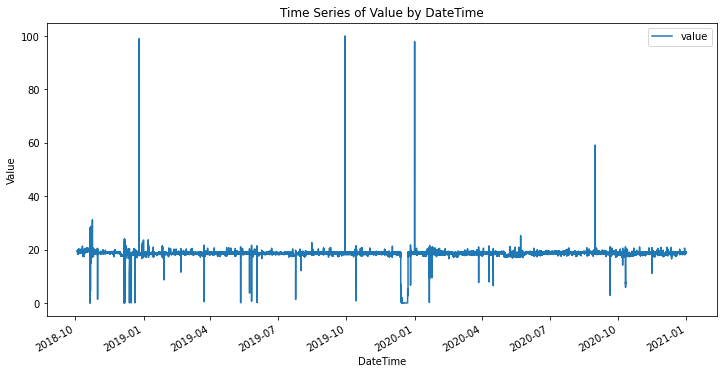

In [ ]:
Data.plot(x= 'datetime', y= 'value', figsize = (12,6))
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Time Series of Value by DateTime')

In [ ]:
Data.drop(['timestamp'], axis = 1, inplace = True)

In [ ]:
Data.head()

,value,datetime
68721,18.79747,2020-12-31 23:59:00
68719,18.67054,2020-12-31 23:48:00
68718,18.99389,2020-12-31 23:41:00
68717,19.03570,2020-12-31 23:02:00
68716,18.73181,2020-12-31 22:53:00


In [ ]:
Data.shape

(68676, 2)

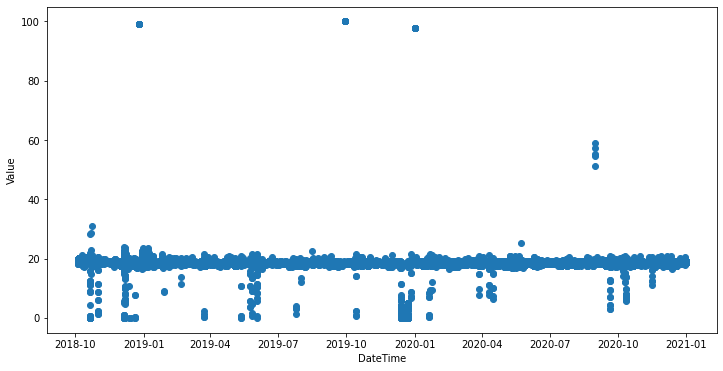

In [ ]:
plt.figure(figsize = (12,6))
x = Data['datetime']
y = Data['value']
plt.scatter(x,y)
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.show()

In [17]:
import keras
from keras import optimizers
from keras import losses
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Embedding, LSTM
from keras.optimizers import RMSprop, Adam, Nadam
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow
import sys

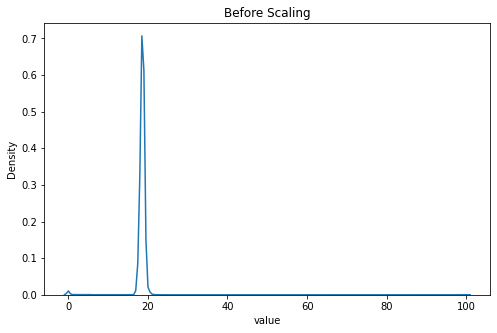

In [ ]:
fig, (ax1) = plt.subplots(ncols = 1, figsize=(8,5))
ax1.set_title('Before Scaling')
sns.kdeplot(Data['value'], ax = ax1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
Data['scaled value'] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(Data['value'])), columns = ['value'])

In [ ]:
Data.shape

(68722, 3)

In [ ]:
Data.head()

,value,datetime,scaled value
0,19.19495,2018-10-04 00:00:00,0.192095
1,19.04453,2018-10-04 00:27:00,0.190591
2,19.26260,2018-10-04 00:28:00,0.192771
3,19.05637,2018-10-04 00:37:00,0.190709
4,19.25317,2018-10-04 00:46:00,0.192677


In [ ]:
Data['scaled value'].count()

68722

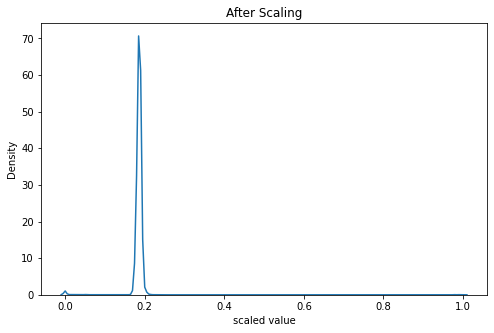

In [ ]:
fig, (ax1) = plt.subplots(ncols = 1, figsize=(8,5))
ax1.set_title('After Scaling')
sns.kdeplot(Data['scaled value'], ax = ax1)

# Building The Long Short Term Memory Model


In [61]:
time_steps = 34361
metric = 'mean_absolute_error'



In [89]:
model = Sequential()
model.add(LSTM(units = 128, activation = 'tanh', input_shape = (time_steps, 1), return_sequences = True ))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'mean_absolute_error', metrics = [metric])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 34361, 128)        66560     
                                                                 
 dense_6 (Dense)             (None, 34361, 1)          129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [90]:
sequence = np.array(Data['scaled value'])
print(sequence)
time_steps = 34361
samples = len(sequence)
trim = samples % time_steps
subsequences = int(samples/time_steps)
sequence_trimmed = sequence[:samples - trim]

print(samples, subsequences)
sequence_trimmed.shape = (subsequences, time_steps, 1)
sequence_trimmed.shape

[0.19209494 0.19059101 0.19277132 ... 0.18685179 0.18812086 0.18812086]
68722 2


(2, 34361, 1)

In [91]:
training_dataset = sequence_trimmed

batch_size = 128
epochs = 20

model.fit(x = training_dataset, y = training_dataset, epochs = epochs, verbose = 1,
          validation_data = (training_dataset, training_dataset),
         callbacks =[TensorBoard(log_dir = f'../logs/{0}' '{tensorlog}')])

Epoch 1/20
1/1 [==============================] - 26s 26s/step - loss: 0.3123 - mean_absolute_error: 0.3123 - val_loss: 0.3029 - val_mean_absolute_error: 0.3029
Epoch 2/20
1/1 [==============================] - 24s 24s/step - loss: 0.3029 - mean_absolute_error: 0.3029 - val_loss: 0.2926 - val_mean_absolute_error: 0.2926
Epoch 3/20
1/1 [==============================] - 22s 22s/step - loss: 0.2926 - mean_absolute_error: 0.2926 - val_loss: 0.2806 - val_mean_absolute_error: 0.2806
Epoch 4/20
1/1 [==============================] - 22s 22s/step - loss: 0.2806 - mean_absolute_error: 0.2806 - val_loss: 0.2657 - val_mean_absolute_error: 0.2657
Epoch 5/20
1/1 [==============================] - 21s 21s/step - loss: 0.2657 - mean_absolute_error: 0.2657 - val_loss: 0.2456 - val_mean_absolute_error: 0.2456
Epoch 6/20
1/1 [==============================] - 21s 21s/step - loss: 0.2456 - mean_absolute_error: 0.2456 - val_loss: 0.2151 - val_mean_absolute_error: 0.2151
Epoch 7/20
1/1 [==================

In [92]:
import math
from sklearn.metrics import mean_squared_error

sequence = np.array(Data['scaled value'])
print(sequence)
time_steps = 34361
samples = len(sequence)
trim = samples % time_steps
subsequences = int(samples/time_steps)
sequence_trimmed = sequence[:samples - trim]

print(samples, subsequences)
sequence_trimmed.shape = (subsequences, time_steps, 1)
print(sequence_trimmed.shape)

testing_dataset = sequence_trimmed
print("testing_dataset: ", testing_dataset.shape)

testing_pred = model.predict(x=testing_dataset)
print("testing_pred: ", testing_pred.shape)

testing_dataset = testing_dataset.reshape((testing_dataset.shape[0]*testing_dataset.shape[1]), testing_dataset.shape[2])
print("testing_dataset: ", testing_dataset.shape)

testing_pred = testing_pred.reshape((testing_pred.shape[0]*testing_pred.shape[1]), testing_pred.shape[2])
print("testing_pred: ", testing_pred.shape)
errorsDF = testing_dataset - testing_pred
print(errorsDF.shape)
rmse = math.sqrt(mean_squared_error(testing_dataset, testing_pred))
print('Test RMSE: %.3f' % rmse)

[0.19209494 0.19059101 0.19277132 ... 0.18685179 0.18812086 0.18812086]
68722 2
(2, 34361, 1)
testing_dataset:  (2, 34361, 1)


1/1 [==============================] - 3s 3s/step
testing_pred:  (2, 34361, 1)
testing_dataset:  (68722, 1)
testing_pred:  (68722, 1)
(68722, 1)
Test RMSE: 0.090


In [93]:
#based on cutoff after sorting errors
dist = np.linalg.norm(testing_dataset - testing_pred, axis=-1)

scores =dist.copy()
print(scores.shape)
scores.sort()
cutoff = int(0.999 * len(scores))
print(cutoff)
#print(scores[cutoff:])
threshold= scores[cutoff]
print(threshold)

(68722,)
68653
0.21178787271031924


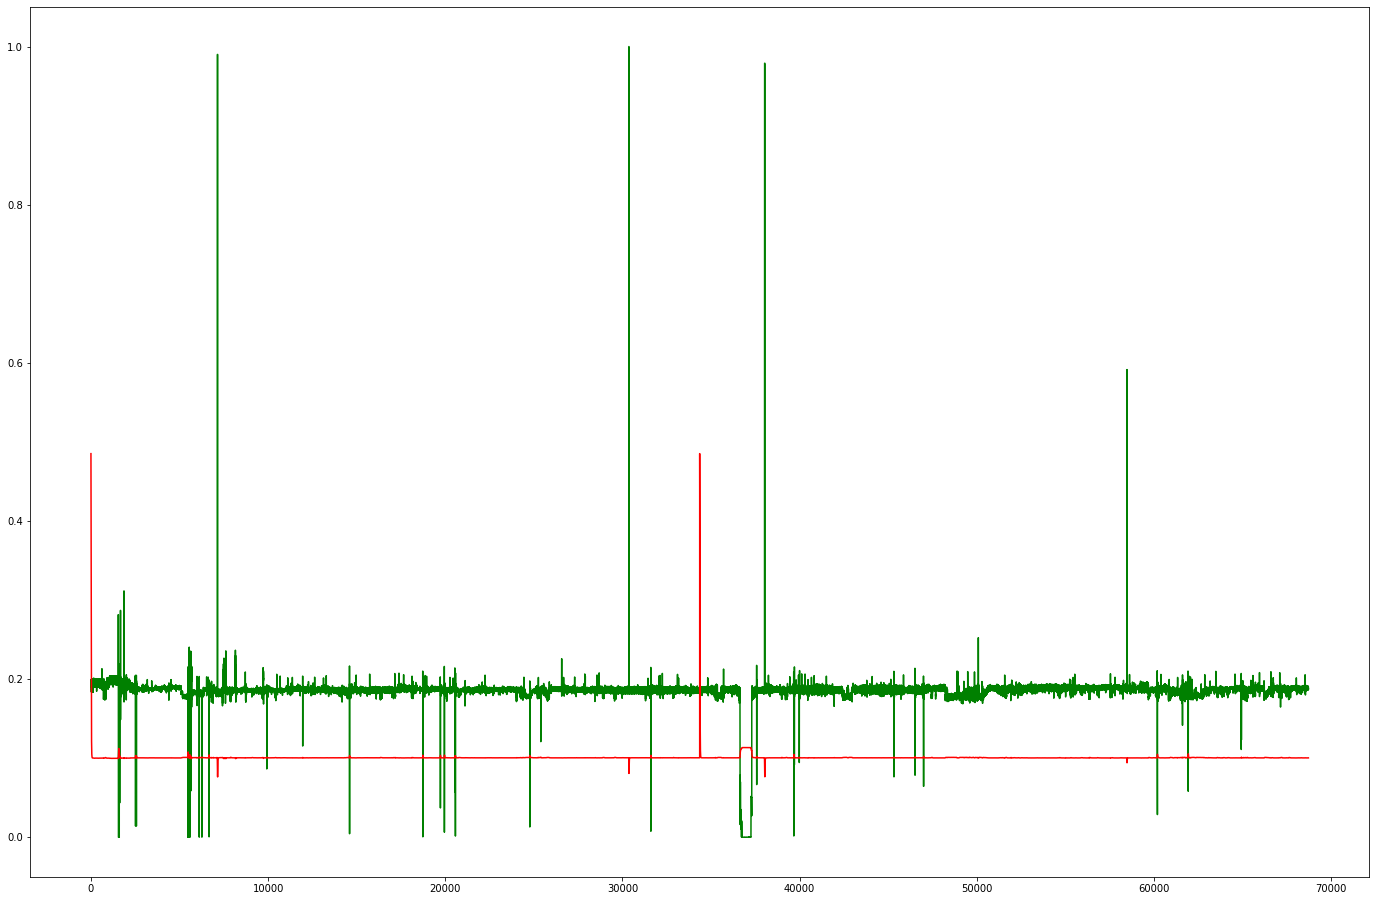

In [94]:
plt.figure(figsize=(24,16))
plt.plot(testing_dataset, color='green')
plt.plot(testing_pred, color='red')

In [1]:
#label the records anomalies or not based on threshold
# z = zip(dist >= threshold, dist)

# y_label=[]
# error = []
# for idx, (is_anomaly, dist) in enumerate(z):
#     if is_anomaly:
#         y_label.append(1)
#     else:
#         y_label.append(0)
#     error.append(dist)
    

In [98]:
class Visualization:
    labels = ["Normal", "Anomaly"]

    def draw_anomaly(self, y, error, threshold):
        groupsDF = pd.DataFrame({'error': error,
                                 'true': y}).groupby('true')

        figure, axes = plt.subplots(figsize=(12, 8))

        for name, group in groupsDF:
            axes.plot(group.index, group.error, marker='x' if name == 1 else 'o', linestyle='',
                    color='r' if name == 1 else 'g', label="Anomaly" if name == 1 else "Normal")

        axes.hlines(threshold, axes.get_xlim()[0], axes.get_xlim()[1], colors="b", zorder=100, label='Threshold')
        axes.legend()
        
        plt.title("Anomalies")
        plt.ylabel("Error")
        plt.xlabel("Data")
        plt.show()

    def draw_error(self, error, threshold):
        plt.figure(figsize=(10, 8))
        plt.plot(error, marker='o', ms=3.5, linestyle='',
                 label='Point')

        plt.hlines(threshold, xmin=0, xmax=len(error)-1, colors="r", zorder=100, label='Threshold')
        plt.legend()
        plt.title("Reconstruction error")
        plt.ylabel("Error")
        plt.xlabel("Data")
        plt.show()

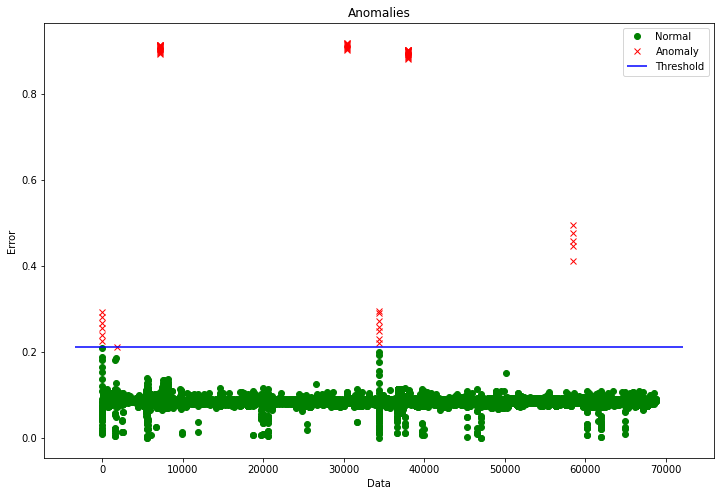

In [99]:
viz = Visualization()
viz.draw_anomaly(y_label, error, threshold)

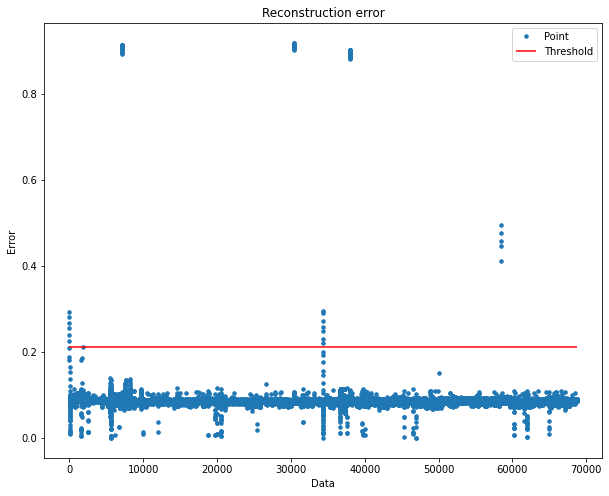

In [100]:
viz.draw_error(error, threshold)

In [101]:
Anomaly_Data = pd.DataFrame({'Datetime': Data['datetime'], 'observation': Data['value'],
                    'error': error, 'anomaly': y_label})
Anomaly_Data.head(5)

,Datetime,observation,error,anomaly
0,2018-10-04 00:00:00,19.19495,0.293084,1
1,2018-10-04 00:27:00,19.04453,0.282277,1
2,2018-10-04 00:28:00,19.26260,0.267057,1
3,2018-10-04 00:37:00,19.05637,0.255544,1
4,2018-10-04 00:46:00,19.25317,0.239548,1


Text(0.5, 1.0, 'Time Series of value by date time')

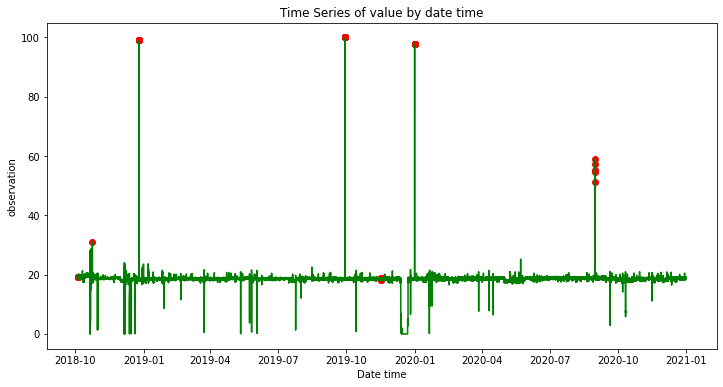

In [102]:
figure, axes = plt.subplots(figsize=(12, 6))
axes.plot(Anomaly_Data['Datetime'], Anomaly_Data['observation'], color='g')
anomaliesDF = Anomaly_Data.query('anomaly == 1')
axes.scatter(anomaliesDF['Datetime'].values, anomaliesDF['observation'], color='r')
plt.xlabel('Date time')
plt.ylabel('observation')
plt.title('Time Series of value by date time')